# Importing the Libraries
lets import the necessary libraries

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Importing the dataset

In [372]:
dataset = pd.read_csv('train.csv')

# Exploratory Data Analysis (EDA) and Data preprocessing
lets start exploring our dataset!

In [373]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [374]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Outlier**:
    - Fare seems to have outlier as 75th percentile  is 31

let's handle it

In [375]:
# handling outlier in the fare column

dataset['Fare'] = dataset['Fare'].clip(0, 200)

In [376]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,30.423994
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,38.770782
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,200.000000


In [377]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Cabin** has **687** missing values, which is about **77%**
    - we will therefore drop it
- **Age** has **177** missing values, which is about **19.8%**
- **Embarked** has **2** missing values, which is too less to worry about
    - let's handle these missing data

# Handling Missing Data

Dropping the Cabin Column

In [378]:
dataset = dataset.drop(['Cabin'], axis=1)

We will handle other **numerical features** after we explore the dataset.

We will do that after exploring our dataset

In [380]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Understanding Visually the Relationship between various Features and Survival rate

**1. Categorical Features**

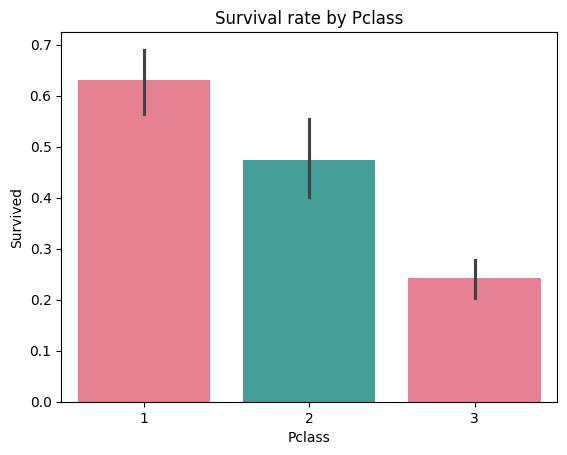

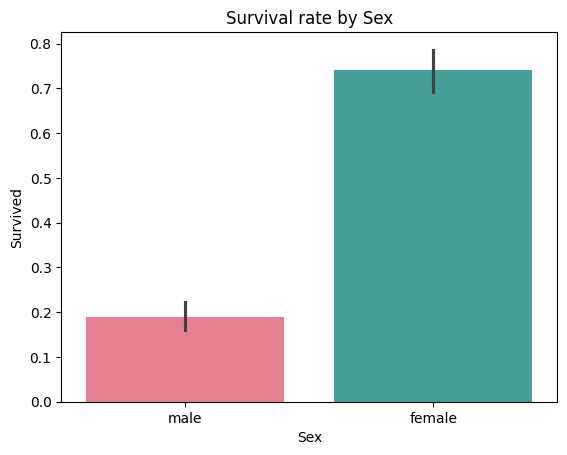

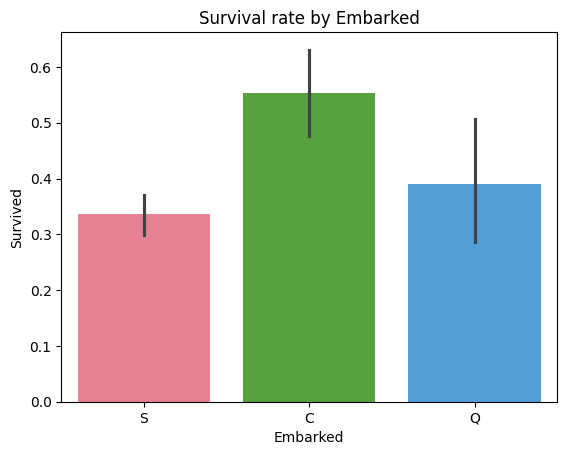

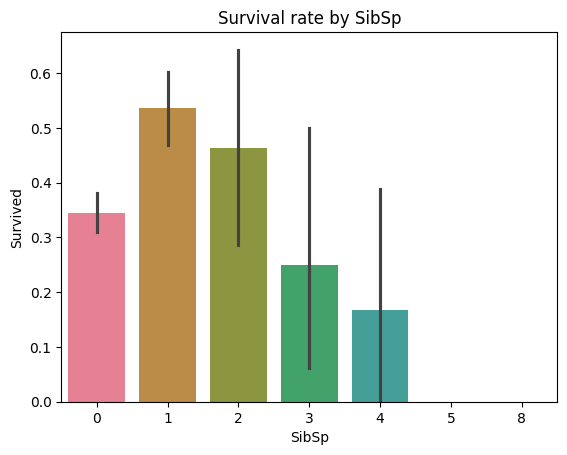

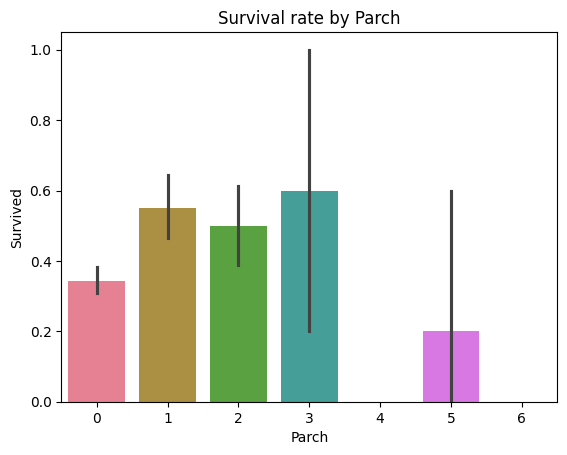

In [381]:
categorical_features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
for col in categorical_features:
    ax = sns.barplot(x = col, y = 'Survived', data=dataset, hue=col,  palette='husl', legend=False)
    plt.title('Survival rate by {}'.format(col))
    plt.show()


**Conclusions**

1. **Survival rate by Pclass**:
    - Passengers in the first class (Pclass = 1) had the highest survival rate, around 0.62 (62%).
    - Passengers in the second class (Pclass = 2) had a moderate survival rate, around 0.48 (48%).
    - Passengers in the third class (Pclass = 3) had the lowest survival rate, around 0.24 (24%).

2. **Survival rate by Sex**:
    - Female passengers had a significantly higher survival rate, around 0.75 (75%).
    - Male passengers had a much lower survival rate, around 0.18 (18%).

3. **Survival rate by Embarked**:
    - Passengers who embarked at 'C' (Cherbourg) had the highest survival rate, around 0.57 (57%).
    - Passengers who embarked at 'Q' (Queenstown) had a moderate survival rate, around 0.39 (39%).
    - Passengers who embarked at 'S' (Southampton) had the lowest survival rate, around 0.33 (33%).

4. **Survival rate by SibSp**:
    - In general, as the number of siblings and spouses (SibSp) increases, the survival rate appears to decrease.
    - Passengers traveling alone (SibSp = 0) have a good survival rate.
    - Passengers traveling with one sibling or spouse (SibSp = 1) have a moderately higher survival rate than those traveling alone.
    - The survival rate drops significantly for passengers traveling with two or more siblings or spouses (SibSp = 2, 3, 4, or 5).

5. **Survival rate by number of parents/children (Parch)**:
    - The survival rate appears to be highest for passengers with one to three parents/children (Parch = 1 ,2, 3).
    - It's difficult to determine a clear trend for passengers with more than three parents/children (Parch > 3) due to the limited data points in the graph.

**Summary:**
- First-class passengers had the best chances of survival, followed by second-class, with third-class having the poorest survival rates.
- Female passengers had a much higher survival rate compared to male passengers.
- Among embarkation points, passengers from Cherbourg had the highest survival rate, while those from Southampton had the lowest.
- Passengers traveling alone or with 1 siblin/spouse have the highest survival rate. The survival rate appears to decrease as the number of siblings and spouses (SibSp) increases.
- The survival rate appears to be highest for passengers with one to three parents/children.


**2. Numerical Features**

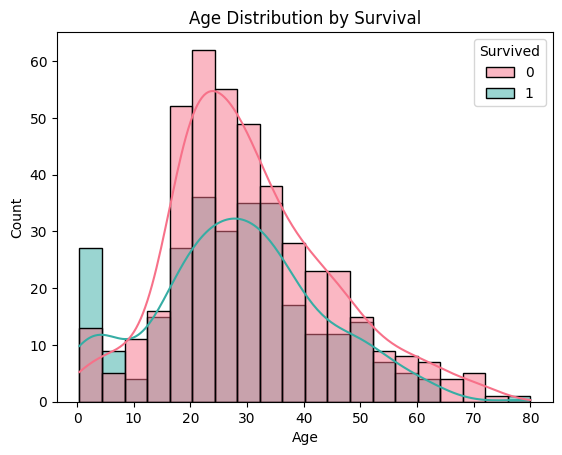

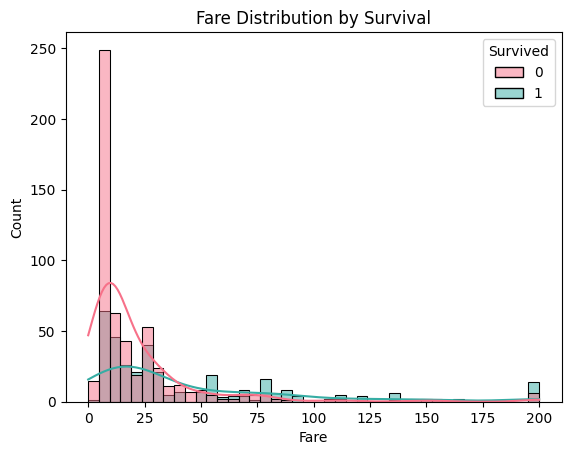

In [382]:
numerical_features = ['Age', 'Fare']
for col in numerical_features:
    sns.histplot(data=dataset, x=col, hue='Survived', kde=True, palette='husl')
    plt.title('{} Distribution by Survival'.format(col))
    plt.show()

**Conclusions**

1. **Age Distribution**:
    - The majority of passengers were between 20-40 years old.
    - There's a higher proportion of survivors in the younger age groups, particularly under 10 years old.
    - Non-survivors outnumber survivors in most age groups, especially in the 20-40 range.
    - The survival rate appears to decrease with age after about 40 years old.

2. **Fare Distribution**:
    - Most passengers paid lower fares, with a high concentration in the 0-25 range.
    - There's a notable spike in non-survivors who paid very low fares (close to 0).
    - Survivors are more evenly distributed across fare ranges, with better representation in higher fare brackets.
    - The survival rate seems to increase as the fare increases, particularly after the 25-50 range.

**Summary**:
- These distributions suggest that age and fare were factors influencing survival rates.
- Younger passengers and those who paid higher fares had better chances of survival. 

# Derived Metrics
let's create some more meaningfull features

1. **Name** doesn't look like a useful column. However, we can extract **Titles** from them. lets check if it is a good feature

In [383]:
dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(dataset['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


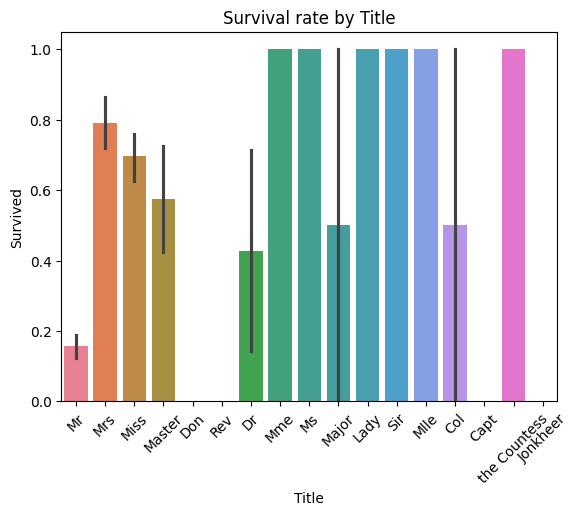

In [384]:
ax = sns.barplot(x = 'Title', y = 'Survived', data=dataset, palette='husl', hue='Title', legend=False)
plt.title('Survival rate by Title')
plt.xticks(rotation=45)

plt.show()

2. **Family Size** can be a good Feature for us

In [385]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

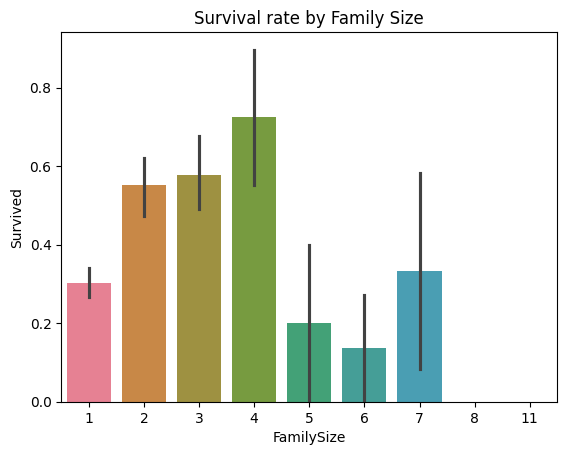

In [386]:
ax = sns.barplot(x = 'FamilySize', y = 'Survived', data=dataset, palette='husl', hue='FamilySize', legend=False)
plt.title('Survival rate by Family Size')
plt.show()

## Key Observations


- The individuals with family size between 2 to 4 have a higher survival rate.

- The individuals with family size > 4 have a significantly lower survival rate.


3. **isAlone** can be a great feature, we will use **Family_Size** = 1 for it.

In [387]:
dataset['IsAlone'] = (dataset['FamilySize'] == 1).astype(int)
dataset['IsAlone'].value_counts()

IsAlone
1    537
0    354
Name: count, dtype: int64

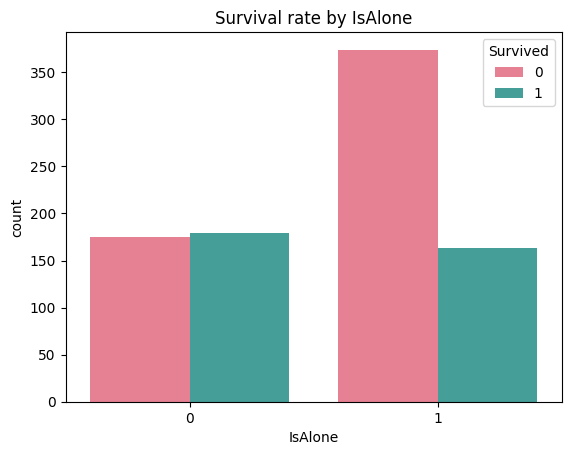

In [388]:
ax = sns.countplot(x='IsAlone', data=dataset, palette='husl', hue='Survived')
plt.title('Survival rate by IsAlone')
plt.show()

## Key Observations

- **Not Alone (0)**:
  - A significant number of individuals who were not alone survived, with the survival count almost equal to the count of those who did not survive.
- **Alone (1)**:
  - The number of individuals who were alone and did not survive is significantly higher than those who survived.

## Conclusion

The chart indicates that individuals who were not alone had a better chance of survival compared to those who were alone.


4. **Fare per person** can also be a good Feature. Lets give it a try

In [389]:
dataset['FarePerPerson'] = dataset['Fare'] / dataset['FamilySize']

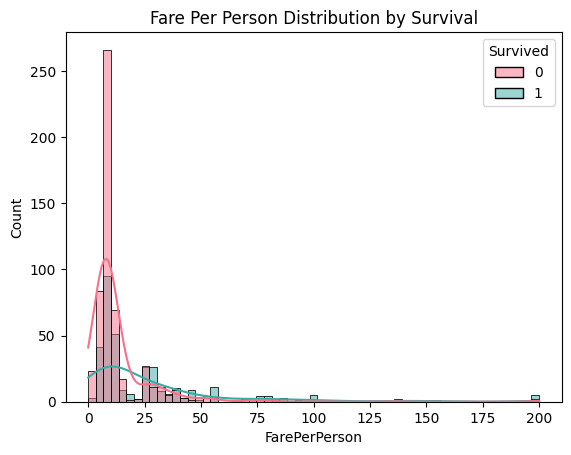

In [390]:
sns.histplot(data=dataset, x='FarePerPerson', hue='Survived', kde=True, palette='husl')
plt.title('Fare Per Person Distribution by Survival')
plt.show()

**Conclusions**
- Most families paid lower fares, with a high concentration in the 0-25 range.
- There's a notable spike in non-survivors who paid very low fare per person.
- The survival rate seems to increase as the fare per person increases, particularly after the 25-50 range.

**Summary**:
- families who paid more fare had a higher chance of survival 

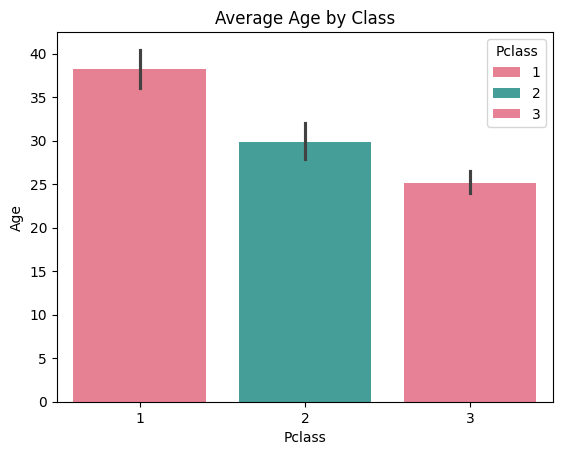

In [391]:
sns.barplot(x='Pclass', y='Age', data=dataset, palette='husl', hue='Pclass')
plt.title('Average Age by Class')
plt.show()

5. **Age*Class** can be good as we can see age is distributed differently in each class

In [392]:
dataset['Age*Class'] = dataset['Age'] * dataset['Pclass']

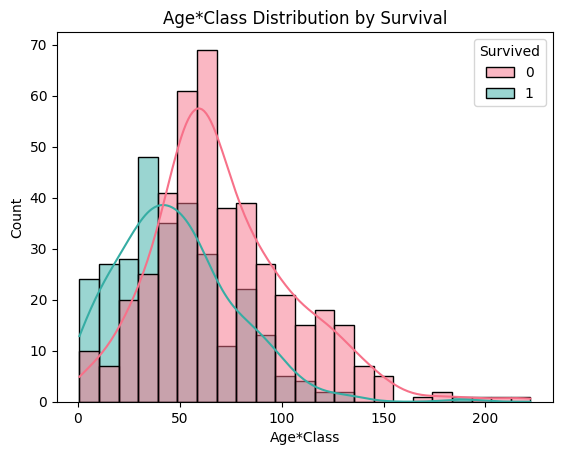

In [393]:
sns.histplot(data=dataset, x='Age*Class', hue='Survived', kde=True, palette='husl')
plt.title('Age*Class Distribution by Survival')
plt.show()

## Conclusions
1. **Survival Rate**: 
   - Generally lower survival rate across all Age*Class values
   - Survival rate seems highest in the 0-50 Age*Class range

2. **Distribution Peaks**:
   - Non-survivors: Major peak around 80-100, minor peak around 20-40
   - Survivors: Major peak around 20-40, minor peak around 60-80

3. **Age*Class Impact**:
   - Higher Age*Class values (>100) associated with lower survival rates
   - Younger Age*Class groups have a more balanced survival/non-survival ratio

**Now we have analysed the data sufficiently and go ahead**

# Let's Prepare Our data for the model

In [394]:
X = dataset.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = dataset['Survived']

In [395]:
numerical_features = ['Age', 'Fare', 'FamilySize', 'Age*Class', 'FarePerPerson']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'IsAlone', 'Title']

# Handling Missing Values

In [396]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X[numerical_features] = imputer.fit_transform(X[numerical_features])

## Feature Scaling

In [397]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Encoding the Categorical Variables

In [398]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)], remainder='passthrough')
X = ct.fit_transform(X).toarray()

## Splitting the dataset into the Training set and Test set

In [399]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training Classification model on the Training set

In [400]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [401]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy = ", accuracy_score(y_test, y_pred))

[[99 11]
 [19 50]]
Accuracy =  0.8324022346368715


**Lets check the cross-val score**

In [402]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.06 %
Standard Deviation: 2.22 %


We need to do **Hyperparameter Tuning** for better results

# HyperParameter Tuning

In [403]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_estimators': [50, 100, 150, 200, 250],
                'criterion': ['gini', 'entropy'],
                'max_depth': [3, 4, 5, 6, 7, 8],
                'min_samples_split': [2, 5, 10]}

random_search = RandomizedSearchCV(estimator = classifier,
                                param_distributions = parameters,
                                scoring = 'accuracy',
                                cv = 10,
                                n_jobs = -1)

random_search.fit(X_train, y_train)
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 83.86 %
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 6, 'criterion': 'entropy'}


# Let's Make Submission

In [404]:
test_data = pd.read_csv('test.csv')
test_ids = test_data['PassengerId']

test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)
test_data['Age*Class'] = test_data['Age'] * test_data['Pclass']
test_data['FarePerPerson'] = test_data['Fare'] / test_data['FamilySize']
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

X_test = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [405]:
X_test[numerical_features] = imputer.transform(X_test[numerical_features])

In [406]:
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
X_test = ct.transform(X_test).toarray()

Making **submission** file

In [407]:
y_pred = random_search.best_estimator_.predict(X_test)


output = pd.DataFrame({'PassengerId': test_ids, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)